In [29]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import risk_management_utils as erk
quandl.ApiConfig.api_key="eEB2sf2qxsV18u4dG6Ve"

In [272]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
af=quandl.get("BSE/BOM500440") ## hindalco
bf=quandl.get("BSE/BOM533519") ## L&T Finance holding
cf=quandl.get("BSE/BOM532215")## axis bank
df=quandl.get("BSE/BOM590003")## KV bank
ef=quandl.get("BSE/BOM500325")## RIL

In [151]:
af.rename(columns={"Close":"Hindalco"},inplace=True)
bf.rename(columns={"Close":"L&T_Fin"},inplace=True)
cf.rename(columns={"Close":"Axis_Bank"},inplace=True)
df.rename(columns={"Close":"KV_BANK"},inplace=True)
ef.rename(columns={"Close":"RIL"},inplace=True)

In [152]:
af_1=af["Hindalco"]
bf_1=bf["L&T_Fin"]
cf_1=cf["Axis_Bank"]
df_1=df["KV_BANK"]
ef_1=ef["RIL"]

In [153]:
retur=pd.concat([af_1,bf_1,cf_1,df_1,ef_1],axis=1,
                  names={"Hindalco","L&T_Fin","Axis_Bank","KV_BANK","RIL"})
daily_returns=retur.pct_change()
daily_returns=daily_returns.tail(247)

In [240]:
returns=retur.tail(247)
daily_returns

,Hindalco,L&T_Fin,Axis_Bank,KV_BANK,RIL
Date,,,,,
2022-05-04,-0.047560,-0.042528,-0.028255,-0.023785,-0.031433
2022-05-05,0.000217,0.008020,-0.006650,-0.002119,-0.019457
2022-05-06,-0.038228,-0.007344,-0.041094,-0.022293,-0.007422
2022-05-09,0.000113,-0.008015,-0.013592,-0.020630,-0.039677
2022-05-10,-0.047512,-0.006837,-0.006475,-0.009978,-0.017440
...,...,...,...,...,...
2023-04-25,0.004442,-0.000333,-0.004646,-0.003130,0.007615
2023-04-26,-0.011521,0.002665,0.010759,-0.006803,-0.005495
2023-04-27,0.014363,0.005979,-0.007603,0.006849,0.006541


0.3832408167725101

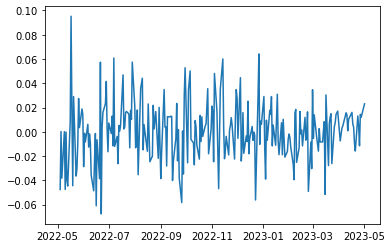

In [155]:
cov=daily_returns.cov()
plt.plot(daily_returns["Hindalco"])
np.sqrt(((daily_returns["Hindalco"]-daily_returns["Hindalco"].mean())**2).sum())

Text(0.5, 1.0, ' volatility: 38.79%')

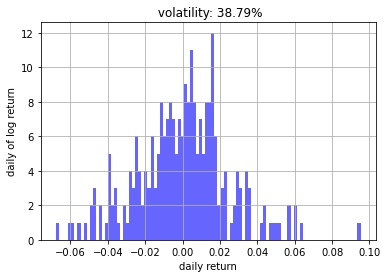

In [156]:
vol=erk.annual_vol(daily_returns["Hindalco"])
str_vol = str(round(vol, 4)*100)

fig, ax = plt.subplots()
daily_returns["Hindalco"].hist(ax=ax, bins=100, alpha=0.6, color='b')
ax.set_xlabel("daily return")
ax.set_ylabel("daily of log return")
ax.set_title(" volatility: " + str_vol + "%")

## 2 asset efficient frontier
- variance minimization

<AxesSubplot:xlabel='risk', ylabel='returns'>

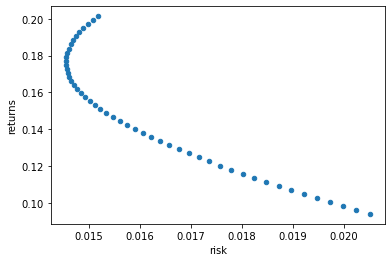

In [275]:
l=["Axis_Bank","L&T_Fin"]
n_points=50
erk.plot_ef2(50,daily_returns[l],cov1)

<AxesSubplot:xlabel='Volatility'>

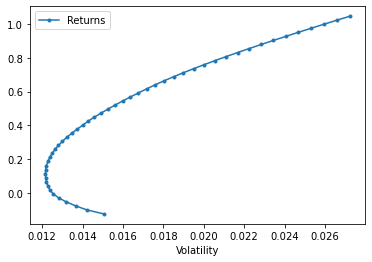

In [276]:
erk.plot_ef(50,daily_returns,cov)

### Kissel-Glantz method

In [21]:

def KisselGlantz(returns,volatility,cov,volume,parameters,x_i,x_f):
    """returns the trading cost of the portfolio when switching from initial position x_i
    to final position x_f
    returns(np.array) : mean return of the portfolio
    volatility(np.array) : volatility of the portfolio
    cov(np.array) : covariance matrix
    volume(np.array) : mean volume of the corresponding stock in the portfolio
    parameters(np.array) : regression parameters for the calculation [alpha_1,alpha_2,alpha_3,beta,eta]
    x_i(np.array) : current portfolio
    x_f(np.array) : final portfolio"""
    
    n=len(returns)
    alpha_1,alpha_2,alpha_3,beta,eta=parameters
    trade=np.zeros((n))
    c=0
    for i in range(n):
        q = alpha_1*np.power(100/volume[i],beta)*np.power(np.abs(x_f[i]-x_i[i]),beta+1)+ (alpha_2*volatility[i]/100 +alpha_3)*np.abs(x_f[i]-x_i[i])
        trade[i]=q
        c+=q
    return c,trade

In [22]:
returns=np.array([5.779,2.679,6.746,7.170,5.894,6.289,6.216,4.461,5.777,3.356])
cov=np.array([[0.002647,-0.000166,-0.000142,-0.000405,0.000016,0.000045,-0.000261,-0.000060,0.000214,0.000001],
[-0.000166,0.002769,-0.000422,0.000115,-0.000014,0.000143,-0.000164,0.000274,0.000168,-0.000364],
[-0.000142,-0.000422,0.002704,-0.000163,-0.000135,0.000149,-0.000174,-0.000121,0.000045,0.000427],
[-0.000405,0.000115,-0.000163,0.002479,0.000066,-0.000065,0.000088,0.000227,-0.000037,-0.000499],
[0.000016,-0.000014,-0.000135,0.000066,0.002292,0.000160,0.000077,0.000240,0.000141,-0.000132],
[0.000045,0.000143,0.000149,-0.000065,0.000160,0.002597,-0.000553,-0.000131,0.000122,0.000394],
[-0.000261,-0.000164,-0.000174,0.000088,0.000077,-0.000553,0.002314,-0.000098,-0.000027,-0.000008],
[-0.000060,0.000274,-0.000121,0.000227,0.000240,-0.000131,-0.000098,0.002317,0.000278,-0.000494],
[0.000214,0.000168,0.000045,-0.000037,0.000141,0.000122,-0.000027,0.000278,0.002736,-0.000222],
[0.000001,-0.000364,0.000427,-0.000499,-0.000132,0.000394,-0.000008,-0.000494,-0.000222,0.002626]])

volatility=np.array([5.145,5.262,5.200,4.979,4.787,5.096,4.810,4.814,5.231,5.124])
volume=np.array([10.000,0.100,0.010,0.100,2.000,3.000,0.500,10.000,100.000,2.000])

In [23]:
parameters=np.array([0.0035,0.3,0.0015,0.65,0.1])
initial =np.array([10,10,10,10,10,10,10,10,10,10])
final =np.array([10.000,0.000,13.773,27.251,10.000,15.184,16.598,0.000,7.194,0.000])

In [28]:
_,arr=KisselGlantz(returns,volatility,cov,volume,parameters,initial,initial)
arr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### minimizing objective function i.e (mean return - lamda * variance - eta * trading_cost) 
#### s.t initial portfolio summation==final

In [ ]:
from scipy.optimize import minimize

def objective_fn(mean,weights,lamda,vol,eta,):
    